# Housing Company Assignment

In [394]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Data Exploration and Particulars

Let us try to upload the data set and explore the different properties in it, to get a basic understanding

In [395]:
# Upload the data
df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [396]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [397]:
# dimensions
df.shape

(1460, 81)

In [398]:
# description
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [399]:
#Null value evaluation
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [400]:
#duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [401]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [402]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [403]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [404]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Data Manipulation (Null value handling, Outliers and so on)

Let us look at the data and peform the required manipulations to make the data set valid

In [405]:
#delete columns that are not needed
df = df.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [406]:
#Identifying outliers in the data(numerical data)
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.

In [407]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55


In [408]:
# values that have null 
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [409]:
# Columns with highest percentage of null
print('The unique values in columsn with highest number if nan or missing values')
print('\n')
print('LotFrontage: ',df['LotFrontage'].value_counts())
print('\n')
print('GarageCond: ',df['GarageCond'].value_counts())
print('\n')
print('GarageType: ',df['GarageType'].value_counts())
print('\n')
print('GarageYrBlt: ',df['GarageYrBlt'].value_counts())
print('\n')
print('GarageFinish: ',df['GarageFinish'].value_counts())
print('\n')
print('GarageQual: ',df['GarageQual'].value_counts())
print('\n')
print('BsmtExposure: ',df['BsmtExposure'].value_counts())
print('\n')
print('BsmtFinType2: ',df['BsmtFinType2'].value_counts())
print('\n')
print('BsmtFinType1: ',df['BsmtFinType1'].value_counts())
print('\n')
print('BsmtCond: ',df['BsmtCond'].value_counts())
print('\n')
print('BsmtQual: ',df['BsmtQual'].value_counts())
print('\n')
print('MasVnrArea: ',df['MasVnrArea'].value_counts())
print('\n')
print('MasVnrType: ',df['MasVnrType'].value_counts())
print('\n')
print('Electrical: ',df['Electrical'].value_counts())


The unique values in columsn with highest number if nan or missing values


LotFrontage:  60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


GarageCond:  TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


GarageType:  Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


GarageYrBlt:  2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1

In [410]:
# for LotFrontage  and GarageYrBlt we will handle missing values using median as it contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# for the "below columns" we will handle null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the "Bsmt" columns we will handle null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    df[col] = df[col].fillna(df[col].mode()[0])
    
# for the columns we will handle null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    df[col] = df[col].fillna(df[col].mode()[0])

In [411]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


In [412]:
# null value check again
df.isnull().values.any()

False

In [413]:

df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [414]:
# The columns PoolArea, MiscVal and 3SsnPorch are dominated by one value. Hence, we will drop it
df = df.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [415]:
#Change the data type of certain columns based on the data description
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Exploratory Data Analysis 

As the data cleansing and hanlding outliers have been completed, let us now do some exploration on the data and plot some visualizations to get some inference

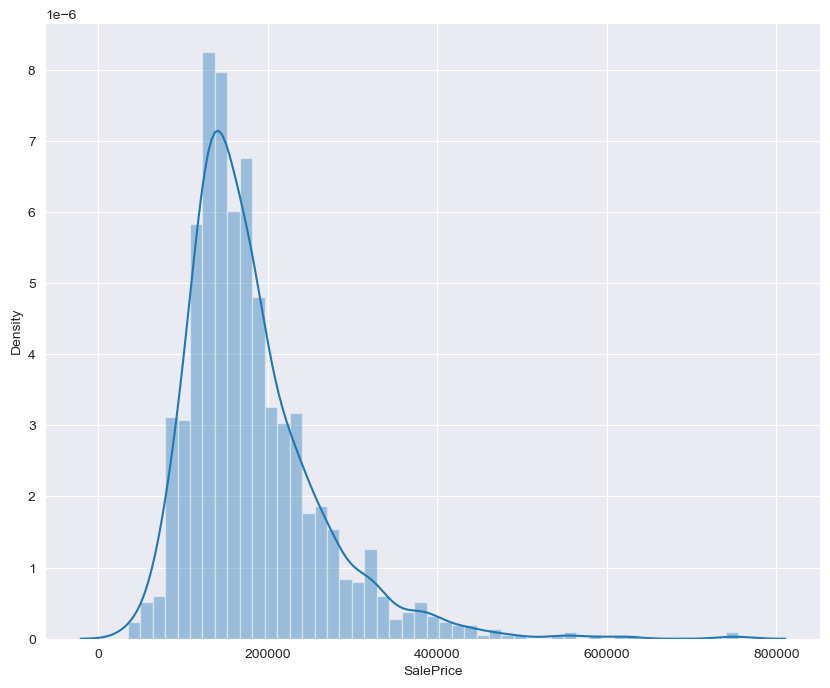

In [417]:
## Analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

Since the Saleprice graph are skewed towards left, we will apply the log transformation to obtain a centralized data


In [418]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

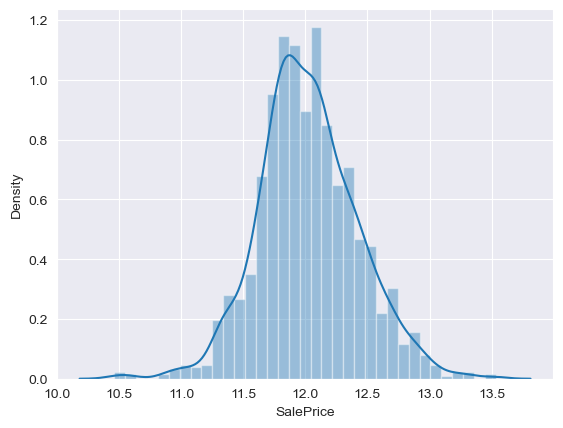

In [419]:
sns.distplot(df['SalePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

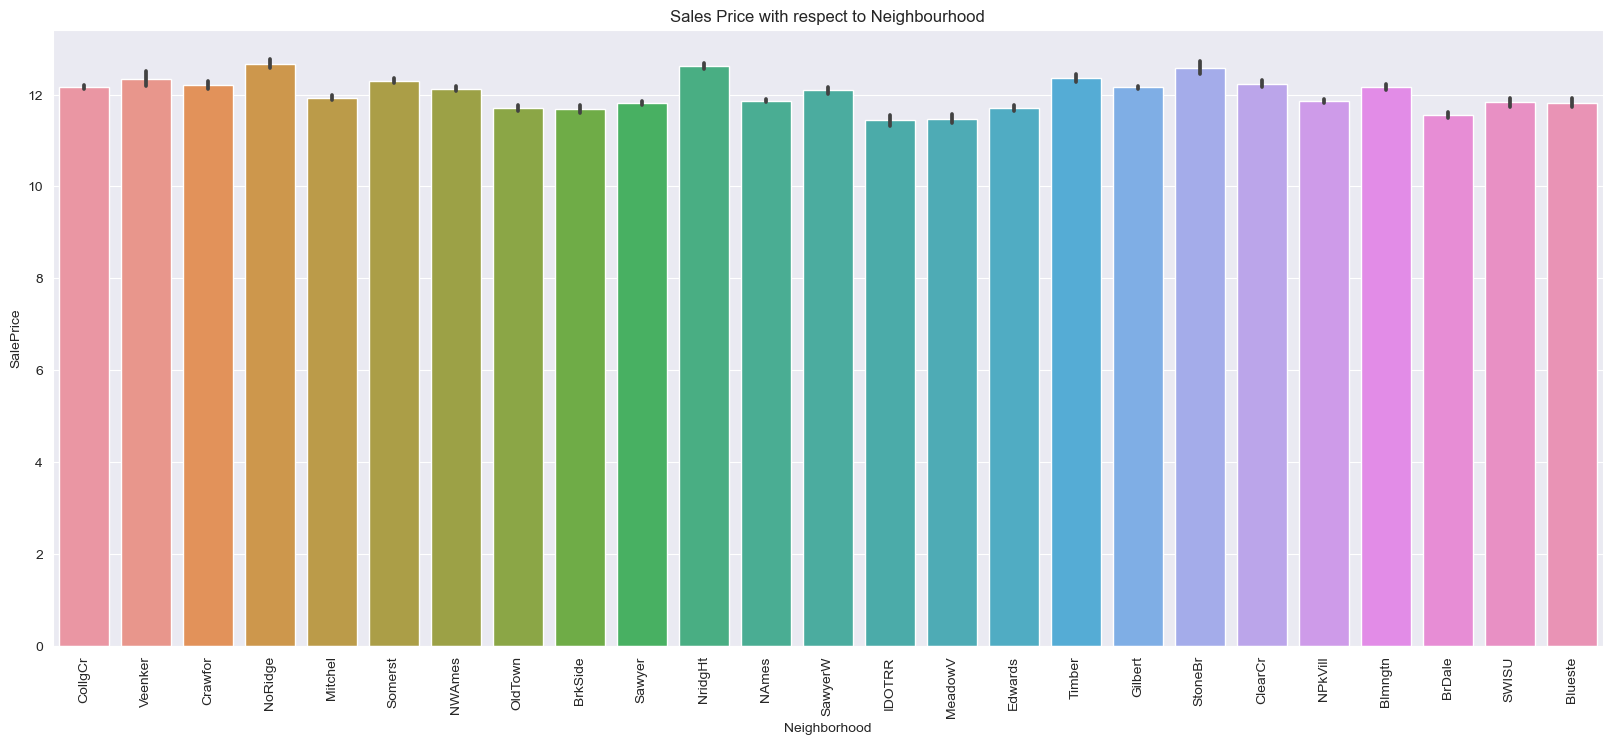

In [420]:
# 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

We can infer that properties in certain neighborhood are over priced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

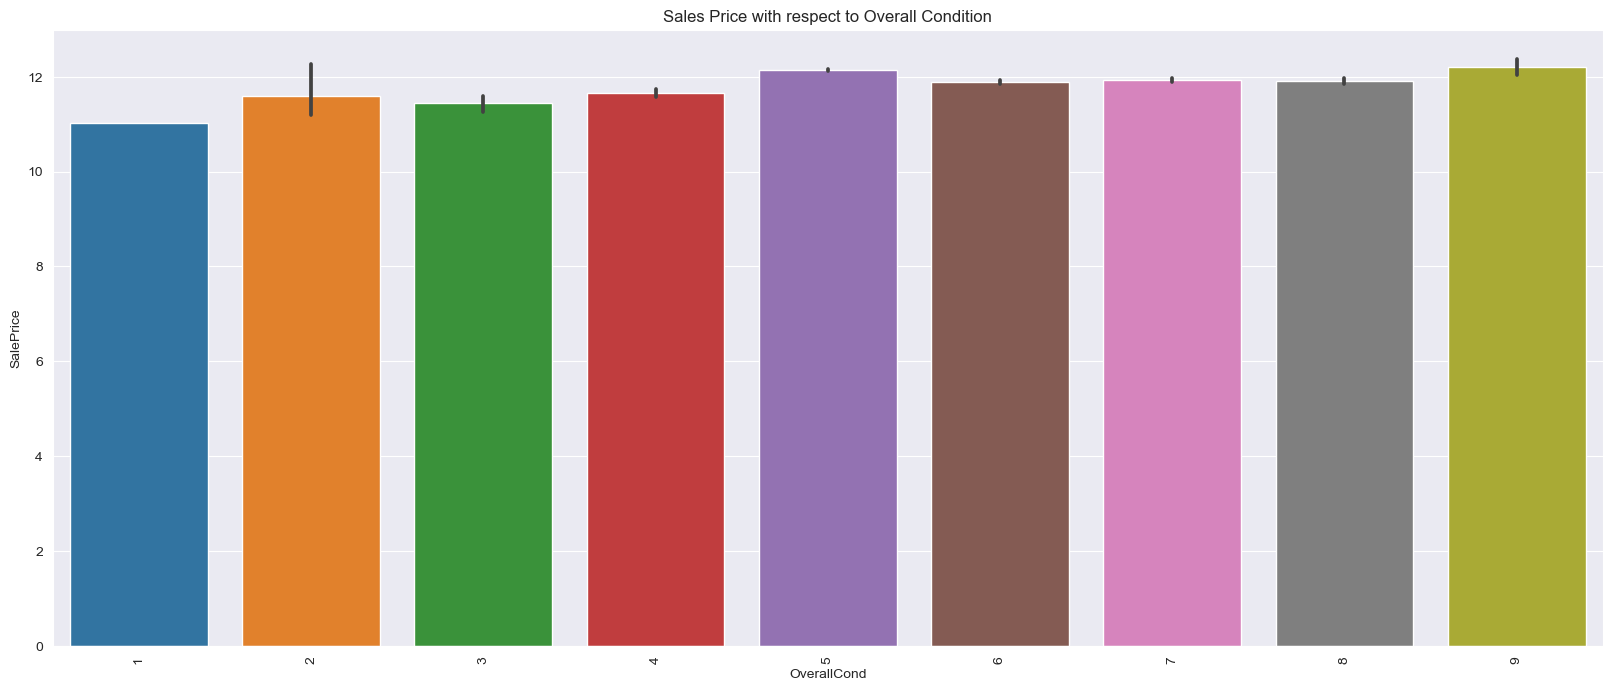

In [421]:
# plot 'overall condition' against 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

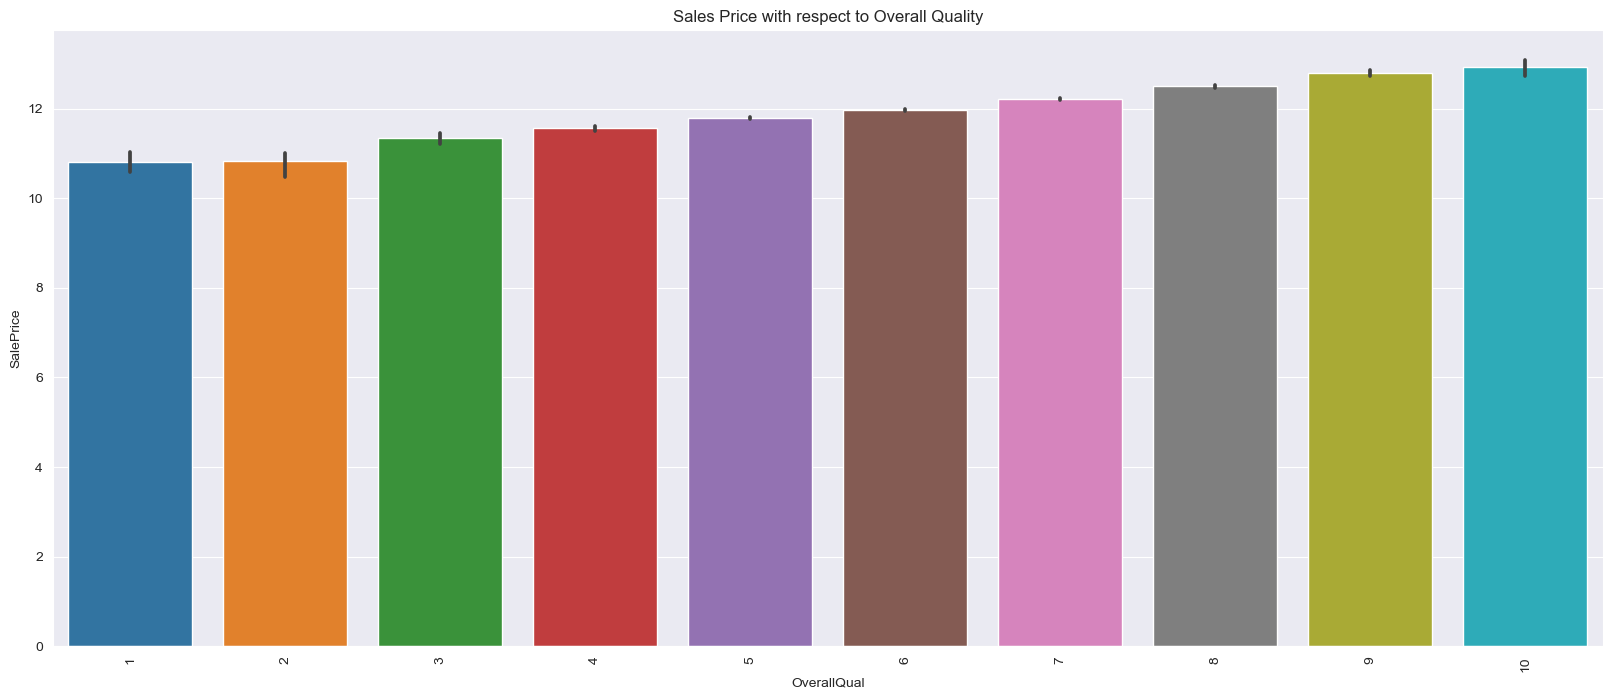

In [422]:
# plot 'overall quality' against 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [423]:
# get all the numeric variables
data_numeric = df.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12,2008,12.429220


In [424]:
# correlation matrix
cor = data_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.026030,-0.013585,-0.021407,-0.073959
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.037655,0.010451,0.006380,0.335292
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.064886,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.054811,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,-0.038740,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.062248,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.015211,0.031706,0.004832


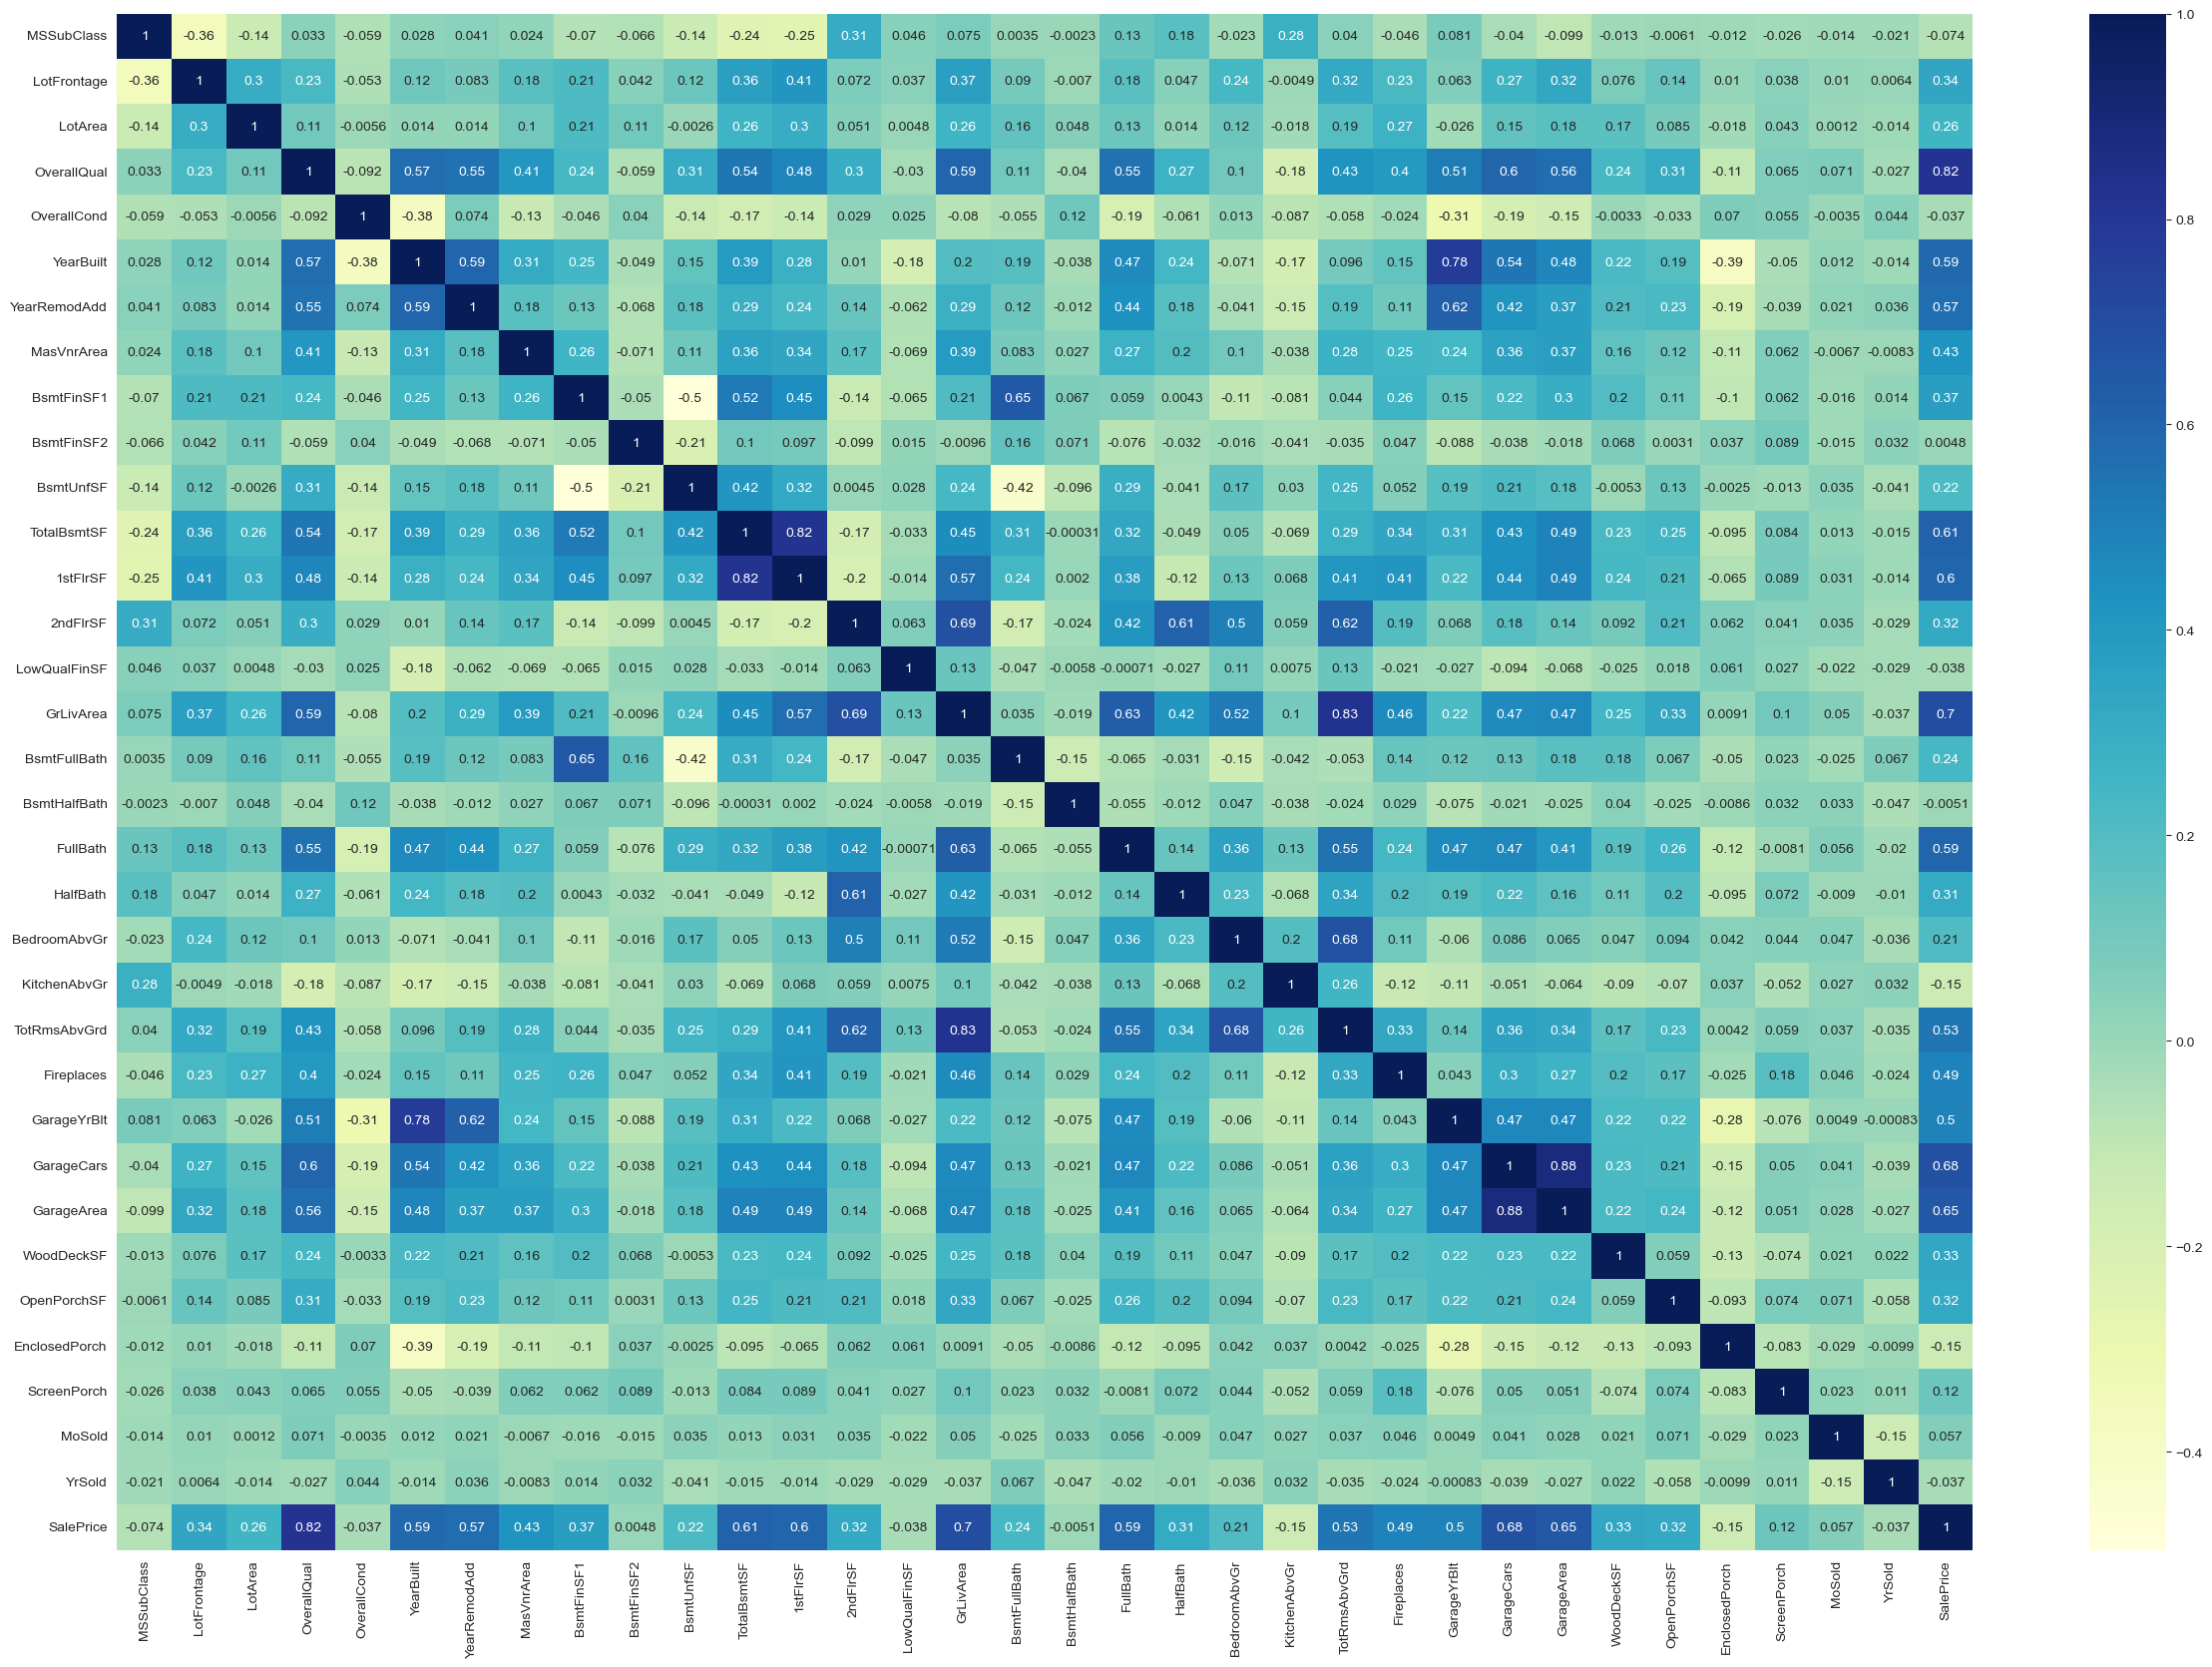

In [425]:
# correlations heatmap

plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

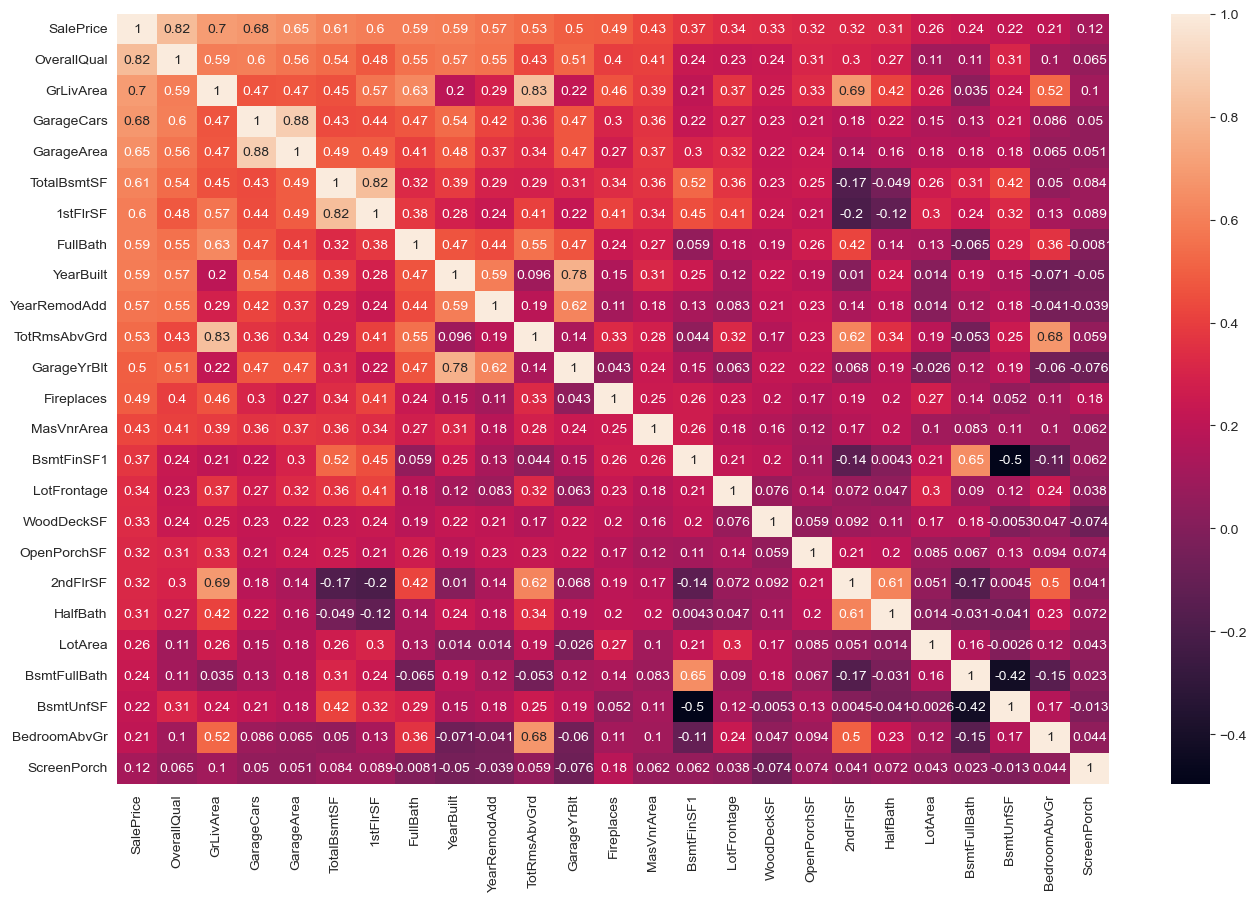

In [426]:
# sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

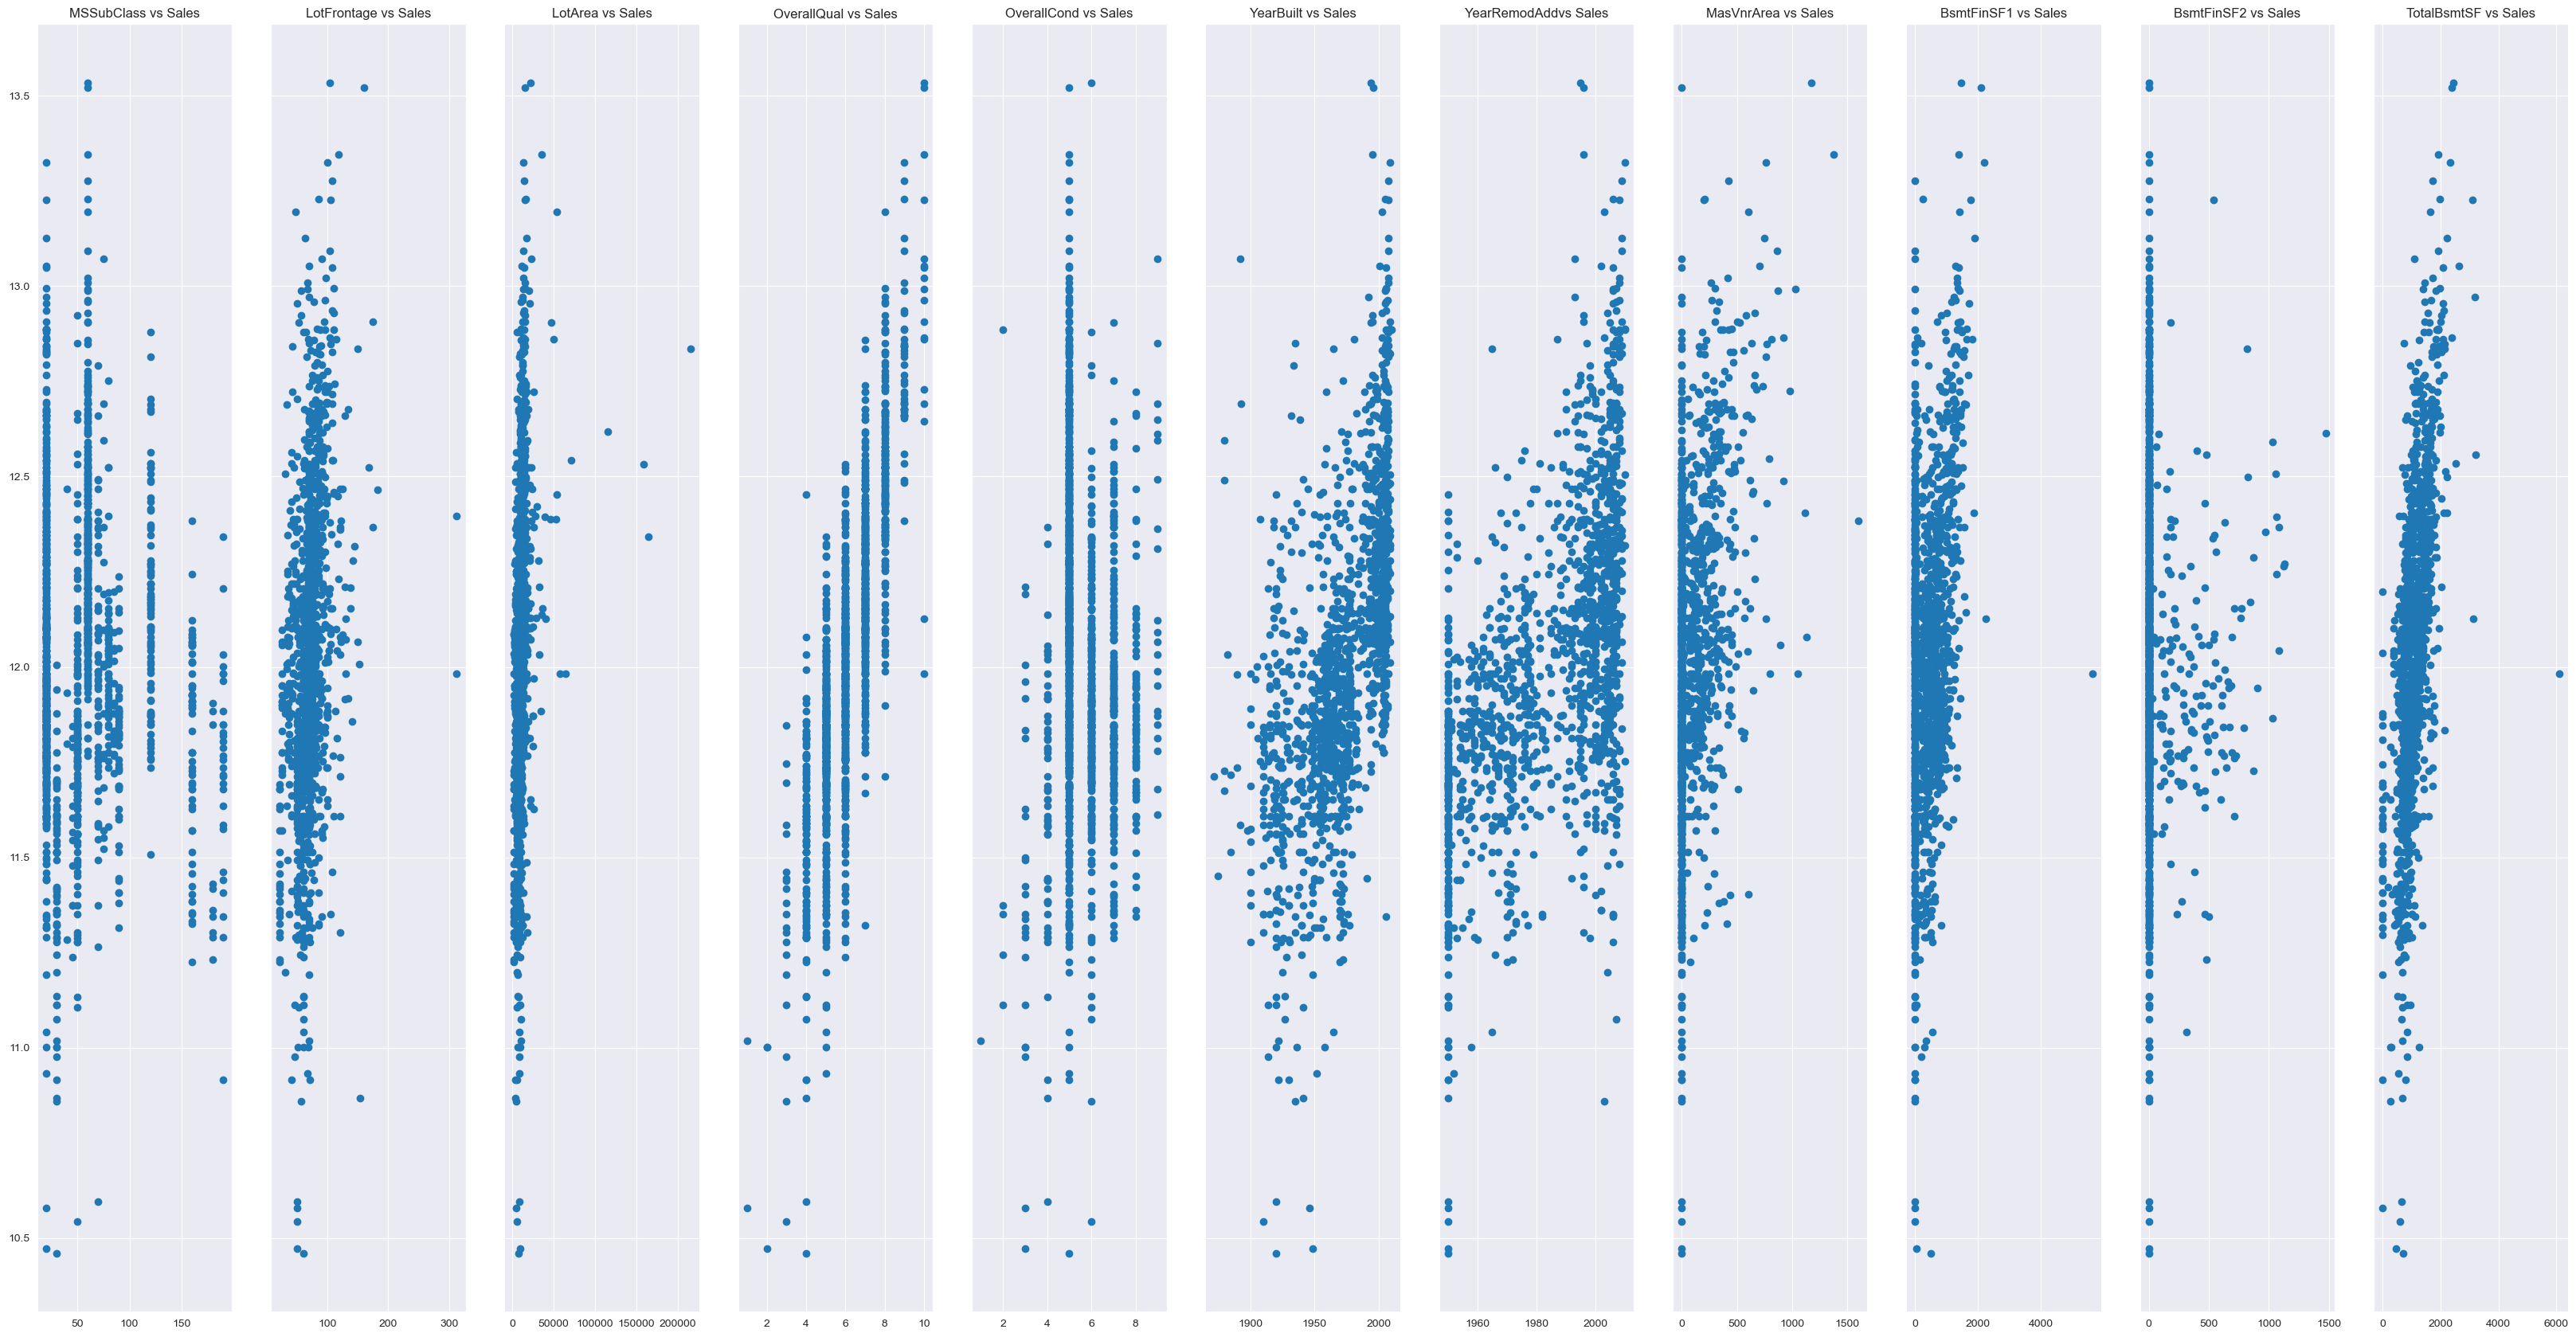

In [427]:
fig, ax = plt.subplots(ncols=11, sharey=True)

MSSubClass = ax[0].scatter(df['MSSubClass'], df['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(df['LotFrontage'], df['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(df['LotArea'], df['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(df['OverallQual'], df['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(df['OverallCond'], df['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(df['YearBuilt'], df['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')

YearRemodAdd = ax[6].scatter(df['YearRemodAdd'], df['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[6].set_title('YearRemodAddvs Sales')

MasVnrArea= ax[7].scatter(df['MasVnrArea'], df['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[7].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[8].scatter(df['BsmtFinSF1'], df['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[8].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[9].scatter(df['BsmtFinSF2'], df['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[9].set_title('BsmtFinSF2 vs Sales')

TotalBsmtSF = ax[10].scatter(df['TotalBsmtSF'], df['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[10].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(41, 21, forward=True)

plt.show()

In [428]:
# We can preapre a derived variable called Property age by calculating yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,12.429220,8


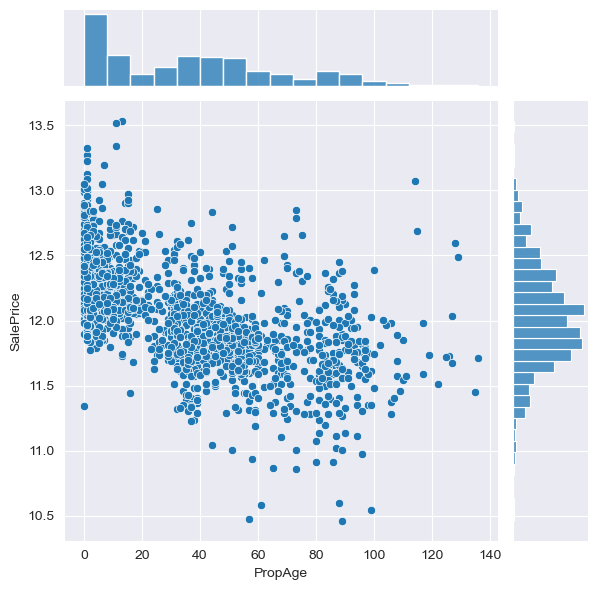

In [429]:
# PropAge vs SalePrice
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

As expected, an increase in the property age results in reduced price as seen in the graph.

In [430]:
#we can drop the below fields as it is of not much help
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,WD,Normal,12.429220,8


In [431]:
#Categorical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [432]:
# creation of dummy variables
df=pd.get_dummies(df,drop_first=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,12.247699,5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,12.109016,31,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,12.317171,7,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,11.849405,91,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,12.429220,8,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Splitting the data into train and test sets

In [433]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [434]:
#Creation of test and train set
y = df.pop('SalePrice')
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [435]:
X = df
X.shape

(1460, 226)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [437]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
615,85,80.0,8800,6,7,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,47,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
613,20,70.0,8402,5,5,0.0,206,0,914,1120,1120,0,0,1120,0,0,1,0,3,1,6,0,1980.0,0,0,0,30,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1303,20,73.0,8688,7,5,228.0,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005.0,3,834,208,59,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
486,20,79.0,10289,5,7,168.0,836,0,237,1073,1073,0,0,1073,1,0,1,1,3,1,6,0,1965.0,2,515,0,0,0,0,42,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
561,20,77.0,10010,5,5,0.0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,1975.0,2,418,240,38,0,0,32,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [438]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (978, 226)
X_test shape (482, 226)
y_train shape (978,)
y_test shape (482,)


## Scaling of numeric varaibles

In [439]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PropAge'],
      dtype='object')

In [440]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PropAge']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge
615,85,80.0,8800,6,7,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,47
613,20,70.0,8402,5,5,0.0,206,0,914,1120,1120,0,0,1120,0,0,1,0,3,1,6,0,1980.0,0,0,0,30,0,0,0
1303,20,73.0,8688,7,5,228.0,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005.0,3,834,208,59,0,0,1
486,20,79.0,10289,5,7,168.0,836,0,237,1073,1073,0,0,1073,1,0,1,1,3,1,6,0,1965.0,2,515,0,0,0,0,42
561,20,77.0,10010,5,5,0.0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,1975.0,2,418,240,38,0,0,32


In [441]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [442]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [443]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
615,0.382353,0.202055,0.035056,0.555556,0.75,0.113208,0.135188,0.000000,0.074058,0.153191,0.165213,0.0,0.0,0.135644,0.333333,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.572727,0.50,0.338505,0.140023,0.000000,0.0,0.0,0.345588,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
613,0.000000,0.167808,0.033195,0.444444,0.50,0.000000,0.036499,0.000000,0.391267,0.183306,0.180358,0.0,0.0,0.148078,0.000000,0.0,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.727273,0.00,0.000000,0.000000,0.054845,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1303,0.000000,0.178082,0.034532,0.666667,0.50,0.165457,0.000000,0.000000,0.691781,0.264484,0.294172,0.0,0.0,0.241522,0.000000,0.0,0.666667,0.0,0.375,0.5,0.416667,0.000000,0.954545,0.75,0.588152,0.242707,0.107861,0.0,0.0,0.007353,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
486,0.000000,0.198630,0.042015,0.444444,0.75,0.121916,0.148122,0.000000,0.101455,0.175614,0.169573,0.0,0.0,0.139224,0.333333,0.0,0.333333,0.5,0.375,0.5,0.333333,0.000000,0.590909,0.50,0.363188,0.000000,0.000000,0.0,0.0,0.308824,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
561,0.000000,0.191781,0.040711,0.444444,0.50,0.000000,0.189759,0.109139,0.083476,0.227332,0.242084,0.0,0.0,0.198757,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.333333,0.681818,0.50,0.294781,0.280047,0.069470,0.0,0.0,0.235294,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [444]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.000000,0.167808,0.033252,0.555556,0.875,0.000000,0.117470,0.0,0.169521,0.173322,0.168426,0.000000,0.0,0.138282,0.000000,0.5,0.333333,0.0,0.375,0.5,0.333333,0.000000,0.572727,0.25,0.186178,0.224037,0.000000,0.000000,0.0,0.316176,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1105,0.235294,0.263699,0.051209,0.777778,0.500,0.262700,0.182849,0.0,0.184503,0.239444,0.267554,0.617162,0.0,0.431047,0.333333,0.0,0.666667,0.5,0.375,0.5,0.583333,0.666667,0.854545,0.50,0.502116,0.217036,0.058501,0.000000,0.0,0.117647,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
413,0.058824,0.119863,0.035804,0.444444,0.625,0.000000,0.000000,0.0,0.431507,0.164975,0.159247,0.000000,0.0,0.130746,0.000000,0.0,0.333333,0.0,0.250,0.5,0.250000,0.333333,0.245455,0.50,0.253879,0.000000,0.000000,0.235507,0.0,0.610294,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
522,0.176471,0.099315,0.017294,0.555556,0.750,0.000000,0.070695,0.0,0.258990,0.164321,0.153740,0.363036,0.0,0.250565,0.000000,0.0,0.666667,0.0,0.375,0.5,0.416667,0.666667,0.454545,0.50,0.296192,0.000000,0.043876,0.065217,0.0,0.433824,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1036,0.000000,0.232877,0.054210,0.888889,0.500,0.050798,0.181077,0.0,0.255993,0.265139,0.295089,0.000000,0.0,0.242276,0.333333,0.0,0.666667,0.0,0.250,0.5,0.333333,0.333333,0.981818,0.75,0.643159,0.266044,0.000000,0.000000,0.0,0.014706,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [445]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,...,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.0,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,0.218964,0.167959,0.044140,0.568848,0.570936,0.077772,0.079504,0.036975,0.243520,0.173364,0.191341,0.193657,0.009825,0.224482,0.141104,0.030675,0.527607,0.187117,0.360302,0.523006,0.377897,0.204158,0.716128,0.446319,0.336531,0.113518,0.091129,0.038907,0.032679,0.270570,0.041922,0.013292,0.785276,0.155419,0.996933,0.030675,0.008180,0.623722,0.029652,0.024540,0.904908,0.001022,0.072597,0.034765,0.003067,0.696319,0.048057,0.009202,0.001022,0.012270,...,0.002045,0.003067,0.037832,0.164622,0.001022,0.287321,0.925358,0.022495,0.003067,0.0,0.917178,0.030675,0.411043,0.496933,0.003067,0.024540,0.022495,0.011247,0.001022,0.928425,0.642127,0.012270,0.063395,0.007157,0.270961,0.287321,0.467280,0.032720,0.011247,0.001022,0.951943,0.026585,0.008180,0.003067,0.960123,0.021472,0.915133,0.004090,0.001022,0.007157,0.001022,0.002045,0.084867,0.001022,0.872188,0.004090,0.005112,0.017382,0.820041,0.085890
std,0.252199,0.078846,0.054015,0.152275,0.139227,0.126946,0.081499,0.134657,0.190149,0.073272,0.089343,0.241474,0.082826,0.098605,0.173519,0.122160,0.181541,0.247314,0.101445,0.107223,0.134876,0.217019,0.220609,0.183246,0.148161,0.153452,0.127449,0.112538,0.118388,0.226310,0.200514,0.114583,0.410841,0.362489,0.055328,0.172523,0.090119,0.484699,0.169713,0.154797,0.293492,0.031976,0.259607,0.183277,0.055328,0.460082,0.213997,0.095536,0.031976,0.110144,...,0.045198,0.055328,0.190888,0.371028,0.031976,0.452744,0.262947,0.148362,0.055328,0.0,0.275754,0.172523,0.492275,0.500246

## Model Building and Evaluation

Let us try to use the Linear Refression function and RFE techniques

In [446]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [447]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [448]:
# listing the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 73),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 18),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 41),
 ('BsmtHalfBath', False, 89),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 15),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 12),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 29),
 ('GarageCars', False, 43),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 106),
 ('EnclosedPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', True, 1),
 ('LotShape_IR2', False, 31),
 ('LotShape_IR3', False, 45),


In [449]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Normal'],
      dtype='object', length=113)

In [450]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'OpenPorchSF', 'LotShape_IR2',
       ...
       'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=113)

In [451]:
# training set with rfe variables
X_train_rfe = X_train[col]

In [452]:
X_train_rfe = pd.DataFrame(X_train[col])

In [453]:
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_Duplex,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Wd Sdng,ExterCond_Gd,ExterCond_Po,Foundation_Slab,Foundation_Wood,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,Functional_Typ,GarageType_CarPort,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
615,0.202055,0.035056,0.555556,0.75,0.135188,0.000000,0.074058,0.153191,0.165213,0.0,0.0,0.135644,0.333333,0.0,0.5,0.000000,0.338505,0.140023,0.0,0.0,0.345588,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
613,0.167808,0.033195,0.444444,0.50,0.036499,0.000000,0.391267,0.183306,0.180358,0.0,0.0,0.148078,0.333333,0.0,0.5,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1303,0.178082,0.034532,0.666667,0.50,0.000000,0.000000,0.691781,0.264484,0.294172,0.0,0.0,0.241522,0.666667,0.0,0.5,0.000000,0.588152,0.242707,0.0,0.0,0.007353,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
486,0.198630,0.042015,0.444444,0.75,0.148122,0.000000,0.101455,0.175614,0.169573,0.0,0.0,0.139224,0.333333,0.5,0.5,0.000000,0.363188,0.000000,0.0,0.0,0.308824,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
561,0.191781,0.040711,0.444444,0.50,0.189759,0.109139,0.083476,0.227332,0.242084,0.0,0.0,0.198757,0.333333,0.0,0.5,0.333333,0.294781,0.280047,0.0,0.0,0.235294,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [454]:
X_train_rfe.shape

(978, 113)

In [455]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9450935011767859

In [456]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.3056163828321677e+17

As you can see, the R2 value is very low on the Test data set. Hence, we need to try other means of regression.

In [457]:
# RFE variables

col1 = X_test.columns[rfe.support_]
col1

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageCond_Po', 'GarageCond_TA', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Normal'],
      dtype='object', length=113)

In [458]:
X_test_rfe = X_test[col1]

In [459]:
X_test_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Sev,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_Duplex,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Wd Sdng,ExterCond_Gd,ExterCond_Po,Foundation_Slab,Foundation_Wood,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseP,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Sev,Functional_Typ,GarageType_CarPort,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
892,0.167808,0.033252,0.555556,0.875,0.117470,0.0,0.169521,0.173322,0.168426,0.000000,0.0,0.138282,0.333333,0.0,0.5,0.000000,0.186178,0.224037,0.000000,0.0,0.316176,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1105,0.263699,0.051209,0.777778,0.500,0.182849,0.0,0.184503,0.239444,0.267554,0.617162,0.0,0.431047,0.666667,0.5,0.5,0.666667,0.502116,0.217036,0.000000,0.0,0.117647,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
413,0.119863,0.035804,0.444444,0.625,0.000000,0.0,0.431507,0.164975,0.159247,0.000000,0.0,0.130746,0.333333,0.0,0.5,0.333333,0.253879,0.000000,0.235507,0.0,0.610294,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
522,0.099315,0.017294,0.555556,0.750,0.070695,0.0,0.258990,0.164321,0.153740,0.363036,0.0,0.250565,0.666667,0.0,0.5,0.666667,0.296192,0.000000,0.065217,0.0,0.433824,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1036,0.232877,0.054210,0.888889,0.500,0.181077,0.0,0.255993,0.265139,0.295089,0.000000,0.0,0.242276,0.666667,0.0,0.5,0.333333,0.643159,0.266044,0.000000,0.0,0.014706,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## Ridge and Lasso Regression 

Let us now try to implment Ridge and Lasso techniques of Regression

In [460]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### RIDGE

In [461]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [462]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007564,0.000863,0.003647,0.000813,0.0001,{'alpha': 0.0001},-0.113126,-0.112859,-0.109484,-0.093138,-0.098378,-0.105397,0.008144,23,-0.060375,-0.061957,-0.058492,-0.062087,-0.064258,-0.061434,0.001921
1,0.007548,0.001027,0.004140,0.001102,0.001,{'alpha': 0.001},-0.112652,-0.112816,-0.109321,-0.093249,-0.098175,-0.105243,0.008034,22,-0.060413,-0.061962,-0.058510,-0.062176,-0.064334,-0.061479,0.001940
2,0.007333,0.002185,0.003749,0.000722,0.01,{'alpha': 0.01},-0.109006,-0.112390,-0.108013,-0.094450,-0.096489,-0.104070,0.007199,21,-0.060958,-0.062016,-0.058884,-0.063172,-0.065046,-0.062015,0.002071
3,0.009650,0.002699,0.003941,0.000785,0.05,{'alpha': 0.05},-0.103583,-0.110728,-0.106513,-0.098030,-0.093299,-0.102431,0.006158,20,-0.063805,-0.062235,-0.061840,-0.066677,-0.067889,-0.064489,0.002405
4,0.006724,0.001545,0.002741,0.000447,0.1,{'alpha': 0.1},-0.102108,-0.109084,-0.106029,-0.100271,-0.091979,-0.101894,0.005827,19,-0.066195,-0.062570,-0.064615,-0.068748,-0.069877,-0.066401,0.002665


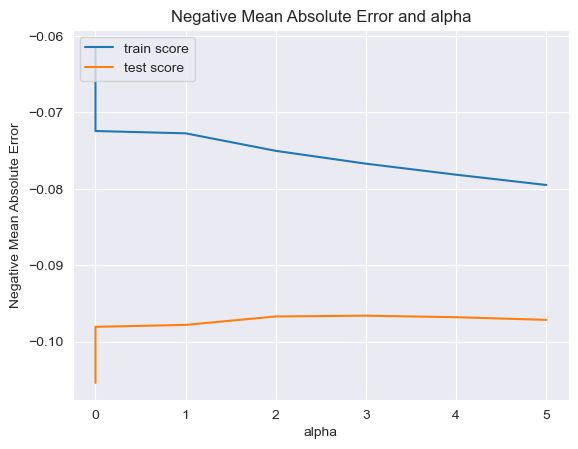

In [463]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Since the mean square error stabilises at alpha 2, we will chose this for our evaluation. 

In [464]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-6.25983046e-02, -5.92009574e-02,  9.81685799e-02,  4.06915282e-01,
        2.34034169e-01,  9.61931608e-03, -5.66902166e-03,  5.88160296e-02,
        5.66990972e-02,  2.72894923e-02,  2.08951823e-01,  1.56057925e-01,
        1.04409638e-01,  2.36256154e-01,  1.33150238e-01,  9.50596738e-03,
        1.53436213e-01,  9.73653379e-02,  1.28946686e-01, -7.44781167e-02,
        1.98505514e-01,  1.22830948e-01, -4.51578541e-02,  2.29798726e-01,
        1.01171155e-01,  8.20639755e-02, -9.52360592e-03,  7.02206182e-02,
        9.95550811e-02, -9.19719705e-02,  1.12748834e-01,  7.12375782e-02,
        8.77428777e-02,  5.68002807e-02,  3.99658127e-02,  4.22130394e-02,
       -6.13767364e-02, -8.93913579e-04,  1.06038106e-01,  5.72871849e-02,
        8.33333949e-02, -8.38258027e-02,  3.53089964e-02, -5.19846958e-02,
       -4.67204584e-02, -1.70079972e-02,  5.58894297e-03,  5.95143710e-02,
       -3.25042099e-02, -4.10094497e-02, -1.54345091e-02,  5.38786003e-02,
       -1.23371624e-02,  

In [465]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.763),
 ('MSSubClass', -0.063),
 ('LotFrontage', -0.059),
 ('LotArea', 0.098),
 ('OverallQual', 0.407),
 ('OverallCond', 0.234),
 ('MasVnrArea', 0.01),
 ('BsmtFinSF1', -0.006),
 ('BsmtFinSF2', 0.059),
 ('BsmtUnfSF', 0.057),
 ('TotalBsmtSF', 0.027),
 ('1stFlrSF', 0.209),
 ('2ndFlrSF', 0.156),
 ('LowQualFinSF', 0.104),
 ('GrLivArea', 0.236),
 ('BsmtFullBath', 0.133),
 ('BsmtHalfBath', 0.01),
 ('FullBath', 0.153),
 ('HalfBath', 0.097),
 ('BedroomAbvGr', 0.129),
 ('KitchenAbvGr', -0.074),
 ('TotRmsAbvGrd', 0.199),
 ('Fireplaces', 0.123),
 ('GarageYrBlt', -0.045),
 ('GarageCars', 0.23),
 ('GarageArea', 0.101),
 ('WoodDeckSF', 0.082),
 ('OpenPorchSF', -0.01),
 ('EnclosedPorch', 0.07),
 ('ScreenPorch', 0.1),
 ('PropAge', -0.092),
 ('MSZoning_FV', 0.113),
 ('MSZoning_RH', 0.071),
 ('MSZoning_RL', 0.088),
 ('MSZoning_RM', 0.057),
 ('Street_Pave', 0.04),
 ('LotShape_IR2', 0.042),
 ('LotShape_IR3', -0.061),
 ('LotShape_Reg', -0.001),
 ('LandContour_HLS', 0.106),
 ('LandContour_Low

In [466]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9229615243979062
0.8898119584634716


In [467]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1370374277222644


In [468]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [469]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
11,1stFlrSF,0.209
21,TotRmsAbvGrd,0.199
70,Neighborhood_StoneBr,0.159
110,RoofMatl_WdShngl,0.156
12,2ndFlrSF,0.156


In [470]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
...,...,...
157,BsmtQual_TA,-0.109
176,Heating_Grav,-0.139
58,Neighborhood_MeadowV,-0.150
191,Functional_Maj2,-0.162


In [471]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
...,...,...
157,BsmtQual_TA,-0.109
176,Heating_Grav,-0.139
58,Neighborhood_MeadowV,-0.150
191,Functional_Maj2,-0.162


In [472]:
predRFE.shape

(220, 2)

## LASSO

In [473]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [474]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050088,0.012783,0.003148,0.000430,0.0001,{'alpha': 0.0001},-0.098035,-0.102600,-0.097362,-0.095843,-0.090883,-0.096945,0.003776,1,-0.066810,-0.064937,-0.065667,-0.071099,-0.070790,-0.067861,0.002590
1,0.011243,0.003137,0.003053,0.000436,0.001,{'alpha': 0.001},-0.098804,-0.096013,-0.104510,-0.096718,-0.092112,-0.097632,0.004065,2,-0.085999,-0.080825,-0.088083,-0.088396,-0.088793,-0.086419,0.002959
2,0.006773,0.001915,0.002515,0.000413,0.01,{'alpha': 0.01},-0.140537,-0.140391,-0.158530,-0.135689,-0.122907,-0.139611,0.011435,3,-0.135456,-0.132559,-0.135631,-0.136346,-0.136814,-0.135361,0.001484
3,0.005415,0.000978,0.002238,0.000169,0.05,{'alpha': 0.05},-0.228858,-0.222263,-0.262614,-0.212103,-0.205639,-0.226295,0.019849,4,-0.224069,-0.224865,-0.220763,-0.226971,-0.229606,-0.225255,0.002953
4,0.005385,0.000734,0.003326,0.000857,0.1,{'alpha': 0.1},-0.285050,-0.281741,-0.338603,-0.274333,-0.265434,-0.289032,0.025688,5,-0.286555,-0.289340,-0.284838,-0.287455,-0.292648,-0.288167,0.002670


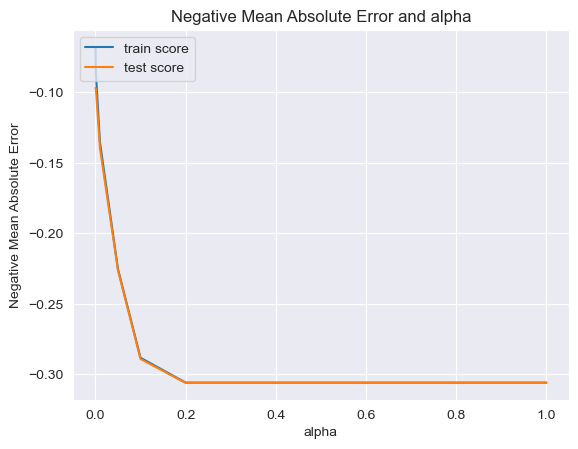

In [475]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Since the mean square value stabilises aroubd 0.2, we can chose a alpha value less than that for a trade off between bias and variance

In [476]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.58554387,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03626533,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.14643231,  0.18064156,  0.        ,  0.31544472,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.042833  , -0.03602755, -0.        ,
        0.        , -0.        , -0.01680584,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

We can see that Lasso brings the coefficients of insignificant features to zero

In [477]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.551),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.586),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.036),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.146),
 ('Fireplaces', 0.181),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.315),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PropAge', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.043),
 ('MSZoning_RM', -0.036),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.017),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSe

In [478]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.773001828806666
0.7667961458797155


The R2 value of test and train set matches well

In [479]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.19936082760053003


In [480]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [481]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.551
1,MSSubClass,-0.000
2,LotFrontage,0.000
3,LotArea,0.000
4,OverallQual,0.586


In [482]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.551
4,OverallQual,0.586
24,GarageCars,0.315
22,Fireplaces,0.181
21,TotRmsAbvGrd,0.146
...,...,...
168,BsmtFinType1_Unf,-0.037
157,BsmtQual_TA,-0.054
145,ExterQual_TA,-0.062
190,KitchenQual_TA,-0.067


In [483]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.551
4,OverallQual,0.586
24,GarageCars,0.315
22,Fireplaces,0.181
21,TotRmsAbvGrd,0.146
183,CentralAir_Y,0.062
33,MSZoning_RL,0.043
12,2ndFlrSF,0.036
165,BsmtFinType1_GLQ,0.025
151,Foundation_PConc,0.024


In [484]:

pred.shape

(21, 2)

In [485]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'CentralAir_Y', 'MSZoning_RL', '2ndFlrSF', 'BsmtFinType1_GLQ', 'Foundation_PConc', 'BsmtExposure_Gd', 'MasVnrType_None', 'LotShape_Reg', 'BsmtExposure_No', 'RoofStyle_Gable', 'MSZoning_RM', 'BsmtFinType1_Unf', 'BsmtQual_TA', 'ExterQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf']


In [486]:
X_train_lasso = X_train[['OverallQual', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'CentralAir_Y', 'MSZoning_RL', '2ndFlrSF', 'BsmtFinType1_GLQ', 'Foundation_PConc', 'BsmtExposure_Gd', 'MasVnrType_None', 'LotShape_Reg', 'BsmtExposure_No', 'RoofStyle_Gable', 'MSZoning_RM', 'BsmtFinType1_Unf', 'BsmtQual_TA', 'ExterQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf']]
X_train_lasso.head()

,OverallQual,GarageCars,Fireplaces,TotRmsAbvGrd,CentralAir_Y,MSZoning_RL,2ndFlrSF,BsmtFinType1_GLQ,Foundation_PConc,BsmtExposure_Gd,MasVnrType_None,LotShape_Reg,BsmtExposure_No,RoofStyle_Gable,MSZoning_RM,BsmtFinType1_Unf,BsmtQual_TA,ExterQual_TA,KitchenQual_TA,GarageFinish_Unf
615,0.555556,0.50,0.000000,0.333333,1,1,0.0,1,1,1,0,1,0,1,0,0,1,1,0,0
613,0.444444,0.00,0.000000,0.333333,1,1,0.0,0,1,0,1,1,1,1,0,0,0,1,1,1
1303,0.666667,0.75,0.000000,0.416667,1,1,0.0,0,1,0,0,1,0,1,0,1,0,0,0,0
486,0.444444,0.50,0.000000,0.333333,1,1,0.0,0,0,0,0,1,1,0,0,0,1,1,1,0
561,0.444444,0.50,0.333333,0.333333,1,1,0.0,0,0,0,1,1,0,1,0,0,0,1,1,0


In [487]:
X_train_lasso.shape

(978, 20)

In [488]:
X_test_lasso = X_test[['OverallQual', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'CentralAir_Y', 'MSZoning_RL', '2ndFlrSF', 'BsmtFinType1_GLQ', 'Foundation_PConc', 'BsmtExposure_Gd', 'MasVnrType_None', 'LotShape_Reg', 'BsmtExposure_No', 'RoofStyle_Gable', 'MSZoning_RM', 'BsmtFinType1_Unf', 'BsmtQual_TA', 'ExterQual_TA', 'KitchenQual_TA', 'GarageFinish_Unf']]

X_test_lasso.head()

,OverallQual,GarageCars,Fireplaces,TotRmsAbvGrd,CentralAir_Y,MSZoning_RL,2ndFlrSF,BsmtFinType1_GLQ,Foundation_PConc,BsmtExposure_Gd,MasVnrType_None,LotShape_Reg,BsmtExposure_No,RoofStyle_Gable,MSZoning_RM,BsmtFinType1_Unf,BsmtQual_TA,ExterQual_TA,KitchenQual_TA,GarageFinish_Unf
892,0.555556,0.25,0.000000,0.333333,1,1,0.000000,1,0,0,1,1,1,0,0,0,1,1,1,0
1105,0.777778,0.50,0.666667,0.583333,1,1,0.617162,1,1,0,0,0,0,1,0,0,0,0,0,0
413,0.444444,0.50,0.333333,0.250000,1,0,0.000000,0,0,0,1,1,1,1,1,1,1,1,1,1
522,0.555556,0.50,0.666667,0.416667,1,0,0.363036,0,0,0,1,1,1,1,1,0,1,1,1,1
1036,0.888889,0.75,0.333333,0.333333,1,1,0.000000,1,1,1,0,0,0,0,0,0,0,0,0,0


## Observation

The RMSE values of RIDGE is better than LASSO, but in order to have a more robust and generalised model, it is important to keep the complexity of the model to minimum. As you can see from our modelling exerise, RIDGE results in 220 predictor variabls making the model highly comples, where as LASSO results in 20 predictor variables making the model simple in nature. 

We will go ahead and use LASSO as it is a simpler model. LASSO brings makes the model simpler by assigning a zero value to insignificant features, enabling us to choosethe predictive variables.


In [489]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'X17', 'X18','X19', 'X20']), inplace = True) 
pred

,Variable,Coeff
C,constant,11.551
x1,OverallQual,0.586
x2,GarageCars,0.315
x3,Fireplaces,0.181
x4,TotRmsAbvGrd,0.146
x5,CentralAir_Y,0.062
x6,MSZoning_RL,0.043
x7,2ndFlrSF,0.036
x8,BsmtFinType1_GLQ,0.025
x9,Foundation_PConc,0.024


Based on our modelling, these are the final features in predicting the price of houses.

The equation can be formulated as: 

Log(Y) = C + 0.586(x1) + 0.315(x2) + 0.181(x3) + 0.146(x4) + 0.062(x5) + 0.043(x6) + 0.036(x7) + 0.025(x8) + 0.024(x9) + 0.002(x10) - 0.004(x11) - 0.017(x12) - 0.022(x13) - 0.027(x14) - 0.036(x15) - 0.037(x16) - 0.054(x17) - 0.062(x18) - 0.067(x19) - 0.090(x20) + Error term( RSS + alpha * (sum of absolute value of coefficients))

To answers the questions raised by the company: 


Which variables are significant in predicting the price of a house?

- The below variables are significant in predicting the price: 
- OverallQual - Rates the overall material and finish of the house
- GarageCars - Size of garage in car capacity
- Fireplaces - Number of fireplaces
- TotRmsAbvGrd - Total rooms above grade (does not include bathrooms)	
- CentralAir_Y - Central air conditioning (YES)
- MSZoning_RL	- Identifies the general zoning classification of the sale (Residential Low Density)
- 2ndFlrSF - Second floor square feet
- BsmtFinType1_GLQ - Rating of basement finished area (Good Living Quarters)
- Foundation_PConc - Type of foundation (Poured Contrete)
- BsmtExposure_Gd	- Refers to walkout or garden level walls(Good Exposure)
- MasVnrType_None	- Masonry veneer type (None)
- LotShape_Reg - General shape of property (Regular)	
- BsmtExposure_No	- Refers to walkout or garden level walls (No Exposure)
- RoofStyle_Gable	- Type of roof (Gable)
- MSZoning_RM	- MSZoning (Residential Medium Density)
- BsmtFinType1_Unf - 	Rating of basement finished area (Unfinshed)
- BsmtQual_TA - Evaluates the height of the basement (Typical (80-89 inches))	
- ExterQual_TA - Evaluates the present condition of the material on the exterior (Average/Typical)	
- KitchenQual_TA - Kitchen quality (TA)	
- GarageFinish_Unf - Interior finish of the garage (Unfinished)


How well those variables describe the price of a house.

The price of the house can be described by the equation
Log(Y) = C + 0.586(OverallQual) + 0.315(GarageCars) + 0.181(Fireplaces) + 0.146(TotRmsAbvGrd) + 0.062(CentralAir_Y) + 0.043(MSZoning_RL) + 0.036(2ndFlrSF) + 0.025(BsmtFinType1_GLQ) + 0.024(Foundation_PConc) + 0.002(BsmtExposure_Gd) - 0.004(MasVnrType_None) - 0.017(LotShape_Reg) - 0.022(BsmtExposure_No) - 0.027(RoofStyle_Gable) - 0.036(MSZoning_RM) - 0.037(BsmtFinType1_Unf) - 0.054(BsmtQual_TA) - 0.062(ExterQual_TA) - 0.067(KitchenQual_TA) - 0.090(GarageFinish_Unf) + Error term( RSS + alpha * (sum of absolute value of coefficients))


# Assignment Questions - Coding 

In [490]:
# Applying Lasso with double Alpha

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [491]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061097,0.007101,0.004710,0.001230,0.0001,{'alpha': 0.0001},-0.098035,-0.102600,-0.097362,-0.095843,-0.090883,-0.096945,0.003776,1,-0.066810,-0.064937,-0.065667,-0.071099,-0.070790,-0.067861,0.002590
1,0.012782,0.003149,0.004215,0.000983,0.001,{'alpha': 0.001},-0.098804,-0.096013,-0.104510,-0.096718,-0.092112,-0.097632,0.004065,2,-0.085999,-0.080825,-0.088083,-0.088396,-0.088793,-0.086419,0.002959
2,0.010768,0.001433,0.005940,0.004349,0.01,{'alpha': 0.01},-0.140537,-0.140391,-0.158530,-0.135689,-0.122907,-0.139611,0.011435,3,-0.135456,-0.132559,-0.135631,-0.136346,-0.136814,-0.135361,0.001484
3,0.008755,0.001298,0.003511,0.000520,0.05,{'alpha': 0.05},-0.228858,-0.222263,-0.262614,-0.212103,-0.205639,-0.226295,0.019849,4,-0.224069,-0.224865,-0.220763,-0.226971,-0.229606,-0.225255,0.002953
4,0.006885,0.001155,0.004176,0.000951,0.1,{'alpha': 0.1},-0.285050,-0.281741,-0.338603,-0.274333,-0.265434,-0.289032,0.025688,5,-0.286555,-0.289340,-0.284838,-0.287455,-0.292648,-0.288167,0.002670


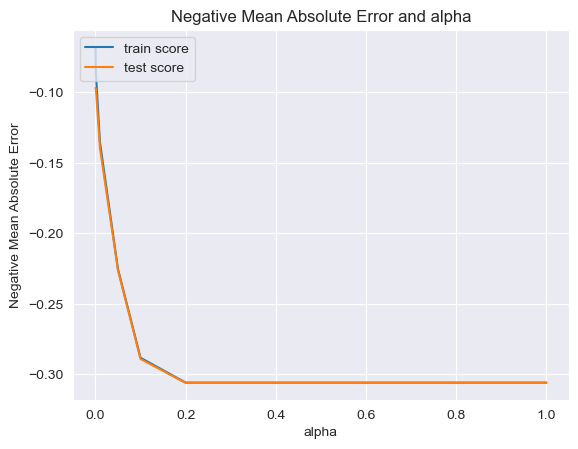

In [492]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [493]:
alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        ,  0.        ,  0.16636954,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.13437114,  0.        ,  0.16096175,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.04790557, -0.        , -0.        ,
        0.        ,  0.        , -0.00239756,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [494]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.016),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.166),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.134),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.161),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PropAge', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.048),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0

In [495]:
# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6158480010756955
0.616487569298309


In [496]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.25565935483500923


In [497]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [498]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.016
1,MSSubClass,-0.000
2,LotFrontage,0.000
3,LotArea,0.000
4,OverallQual,0.166


In [499]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.016
4,OverallQual,0.166
24,GarageCars,0.161
22,Fireplaces,0.134
33,MSZoning_RL,0.048
...,...,...
141,MasVnrType_None,-0.027
157,BsmtQual_TA,-0.078
190,KitchenQual_TA,-0.082
145,ExterQual_TA,-0.104


In [500]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.016
4,OverallQual,0.166
24,GarageCars,0.161
22,Fireplaces,0.134
33,MSZoning_RL,0.048
165,BsmtFinType1_GLQ,0.031
151,Foundation_PConc,0.017
38,LotShape_Reg,-0.002
99,RoofStyle_Gable,-0.007
163,BsmtExposure_No,-0.009


In [501]:
# Ridge with alpha value doubled
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [502]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009721,0.001632,0.004028,0.000669,0.0001,{'alpha': 0.0001},-0.113126,-0.112859,-0.109484,-0.093138,-0.098378,-0.105397,0.008144,23,-0.060375,-0.061957,-0.058492,-0.062087,-0.064258,-0.061434,0.001921
1,0.008336,0.001200,0.003768,0.000731,0.001,{'alpha': 0.001},-0.112652,-0.112816,-0.109321,-0.093249,-0.098175,-0.105243,0.008034,22,-0.060413,-0.061962,-0.058510,-0.062176,-0.064334,-0.061479,0.001940
2,0.008420,0.001264,0.003606,0.000709,0.01,{'alpha': 0.01},-0.109006,-0.112390,-0.108013,-0.094450,-0.096489,-0.104070,0.007199,21,-0.060958,-0.062016,-0.058884,-0.063172,-0.065046,-0.062015,0.002071
3,0.008657,0.002540,0.003889,0.000995,0.05,{'alpha': 0.05},-0.103583,-0.110728,-0.106513,-0.098030,-0.093299,-0.102431,0.006158,20,-0.063805,-0.062235,-0.061840,-0.066677,-0.067889,-0.064489,0.002405
4,0.006773,0.001710,0.003201,0.000880,0.1,{'alpha': 0.1},-0.102108,-0.109084,-0.106029,-0.100271,-0.091979,-0.101894,0.005827,19,-0.066195,-0.062570,-0.064615,-0.068748,-0.069877,-0.066401,0.002665


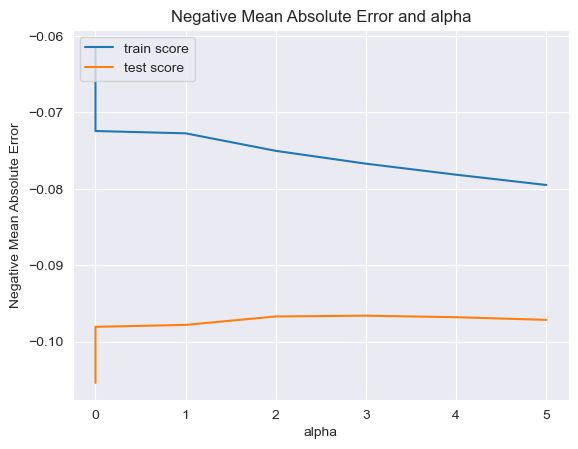

In [224]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [225]:
#double alpha
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-6.65638053e-02, -3.37990684e-02,  7.16990640e-02,  3.59348535e-01,
        2.09972604e-01,  1.35726853e-02,  1.01737265e-02,  5.03732660e-02,
        6.53784275e-02,  4.36849738e-02,  1.67528305e-01,  1.51472709e-01,
        7.88071689e-02,  1.97917000e-01,  1.23054977e-01,  6.06085132e-03,
        1.52811469e-01,  9.63304086e-02,  1.20472045e-01, -5.34741365e-02,
        1.96827670e-01,  1.29618628e-01, -3.53981519e-02,  2.16989593e-01,
        1.10176728e-01,  8.26669915e-02, -5.72912128e-03,  5.76575252e-02,
        8.97163782e-02, -7.12840571e-02,  7.33736586e-02,  4.01849966e-02,
        5.89305416e-02,  1.72609892e-02,  2.19094697e-02,  4.47267075e-02,
       -5.59527771e-02, -1.95653424e-03,  9.52183865e-02,  4.45332137e-02,
        7.12869425e-02, -4.92615924e-02,  3.93263070e-02, -4.65261617e-02,
       -2.38115729e-02, -1.54606679e-02,  2.75659808e-03,  4.70843608e-02,
       -1.84292180e-02, -3.17333940e-02, -1.55562221e-02,  4.89860381e-02,
       -1.71428241e-02,  

In [226]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.941),
 ('MSSubClass', -0.067),
 ('LotFrontage', -0.034),
 ('LotArea', 0.072),
 ('OverallQual', 0.359),
 ('OverallCond', 0.21),
 ('MasVnrArea', 0.014),
 ('BsmtFinSF1', 0.01),
 ('BsmtFinSF2', 0.05),
 ('BsmtUnfSF', 0.065),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.168),
 ('2ndFlrSF', 0.151),
 ('LowQualFinSF', 0.079),
 ('GrLivArea', 0.198),
 ('BsmtFullBath', 0.123),
 ('BsmtHalfBath', 0.006),
 ('FullBath', 0.153),
 ('HalfBath', 0.096),
 ('BedroomAbvGr', 0.12),
 ('KitchenAbvGr', -0.053),
 ('TotRmsAbvGrd', 0.197),
 ('Fireplaces', 0.13),
 ('GarageYrBlt', -0.035),
 ('GarageCars', 0.217),
 ('GarageArea', 0.11),
 ('WoodDeckSF', 0.083),
 ('OpenPorchSF', -0.006),
 ('EnclosedPorch', 0.058),
 ('ScreenPorch', 0.09),
 ('PropAge', -0.071),
 ('MSZoning_FV', 0.073),
 ('MSZoning_RH', 0.04),
 ('MSZoning_RL', 0.059),
 ('MSZoning_RM', 0.017),
 ('Street_Pave', 0.022),
 ('LotShape_IR2', 0.045),
 ('LotShape_IR3', -0.056),
 ('LotShape_Reg', -0.002),
 ('LandContour_HLS', 0.095),
 ('LandContour_Low'

In [236]:
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9171069514283
0.8877711819145719


In [239]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1383006307020913


In [240]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [241]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
11,1stFlrSF,0.209
21,TotRmsAbvGrd,0.199
70,Neighborhood_StoneBr,0.159
110,RoofMatl_WdShngl,0.156
12,2ndFlrSF,0.156


In [242]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
...,...,...
157,BsmtQual_TA,-0.109
176,Heating_Grav,-0.139
58,Neighborhood_MeadowV,-0.150
191,Functional_Maj2,-0.162


In [243]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,10.763
4,OverallQual,0.407
14,GrLivArea,0.236
5,OverallCond,0.234
24,GarageCars,0.230
...,...,...
157,BsmtQual_TA,-0.109
176,Heating_Grav,-0.139
58,Neighborhood_MeadowV,-0.150
191,Functional_Maj2,-0.162


In [380]:
# Question no 3: Top five predictors not being there in the data set for LASSO

#top 5 predictors are:
#Fireplaces
#TotRmsAbvGrd
#CentralAir_Y
#MSZoning_RL
#2ndFlrSF


X_train2 = X_train.drop(['Fireplaces','TotRmsAbvGrd','CentralAir_Y','MSZoning_RL','2ndFlrSF'],axis=1)
X_test2 = X_test.drop(['Fireplaces','TotRmsAbvGrd','CentralAir_Y','MSZoning_RL','2ndFlrSF'],axis=1)


In [385]:
X_train2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=221)

In [382]:
X_test2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.000000,0.167808,0.033252,0.555556,0.875,0.000000,0.117470,0.0,0.169521,0.173322,0.168426,0.0,0.138282,0.000000,0.5,0.333333,0.0,0.375,0.5,0.572727,0.25,0.186178,0.224037,0.000000,0.000000,0.0,0.316176,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1105,0.235294,0.263699,0.051209,0.777778,0.500,0.262700,0.182849,0.0,0.184503,0.239444,0.267554,0.0,0.431047,0.333333,0.0,0.666667,0.5,0.375,0.5,0.854545,0.50,0.502116,0.217036,0.058501,0.000000,0.0,0.117647,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
413,0.058824,0.119863,0.035804,0.444444,0.625,0.000000,0.000000,0.0,0.431507,0.164975,0.159247,0.0,0.130746,0.000000,0.0,0.333333,0.0,0.250,0.5,0.245455,0.50,0.253879,0.000000,0.000000,0.235507,0.0,0.610294,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
522,0.176471,0.099315,0.017294,0.555556,0.750,0.000000,0.070695,0.0,0.258990,0.164321,0.153740,0.0,0.250565,0.000000,0.0,0.666667,0.0,0.375,0.5,0.454545,0.50,0.296192,0.000000,0.043876,0.065217,0.0,0.433824,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1036,0.000000,0.232877,0.054210,0.888889,0.500,0.050798,0.181077,0.0,0.255993,0.265139,0.295089,0.0,0.242276,0.333333,0.0,0.666667,0.0,0.250,0.5,0.981818,0.75,0.643159,0.266044,0.000000,0.000000,0.0,0.014706,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [386]:
#lasso 

alpha = 0.01
lasso = Lasso(alpha=alpha)
lasso.fit(X_train2, y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.47717656e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.09907509e-01,  0.00000000e+00,  0.00000000e+00,  2.54582405e-02,
        1.03642987e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.45418196e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -8.44449995e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.91618296e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [387]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train2.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.615),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.748),
 ('OverallCond', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.11),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.025),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.345),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PropAge', -0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RM', -0.084),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.029),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),

In [388]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train2, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train2)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test2)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.748255400438887
0.7455719557026768


In [389]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.20823534936010168


In [390]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [391]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,11.615
1,MSSubClass,-0.000
2,LotFrontage,0.000
3,LotArea,0.000
4,OverallQual,0.748


In [392]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,11.615
4,OverallQual,0.748
21,GarageCars,0.345
13,GrLivArea,0.110
16,FullBath,0.025
...,...,...
164,BsmtFinType1_Unf,-0.045
141,ExterQual_TA,-0.047
185,KitchenQual_TA,-0.066
30,MSZoning_RM,-0.084


In [393]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,11.615
4,OverallQual,0.748
21,GarageCars,0.345
13,GrLivArea,0.110
16,FullBath,0.025
157,BsmtExposure_Gd,0.013
147,Foundation_PConc,0.013
161,BsmtFinType1_GLQ,0.011
17,HalfBath,0.010
92,HouseStyle_2Story,0.001
